# "Плодородная" часть света

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import pycountry_convert as pc

# снимем некоторые ограничения на отображение таблицы pandas
# в jupyter, для удобного чтения таблиц:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# функция с помощью которой будем относить страну к континенту.
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [6]:
# На сайтах kaggle.com и datahub.io возьмем несколько датасетов,
# показывающих численность населения по странам в разные годы
# и показатель ВВП этих стран.
# Возьмем из таблиц нужные колонки и отсортируем их.

earth_population = pd.read_csv('https://raw.githubusercontent.com/milto-oy/DA/main/Lesson5HT/finaldata.csv')[['year','count_zw', 'growthrate_zw']].sort_values(ascending=False, by='year').set_index('year')
population_YC = pd.read_csv('https://raw.githubusercontent.com/milto-oy/DA/main/Lesson5HT/population.csv')
GDP = pd.read_csv('https://raw.githubusercontent.com/milto-oy/DA/main/Lesson5HT/GDP%20by%20Country%201999-2022.csv')
# World population 1952-2020 • 4 sources https://www.kaggle.com/datasets/pavelbiz/world-population-1952-2020-3-sources?select=finaldata.csv
# Population Figures By Country https://datahub.io/JohnSnowLabs/population-figures-by-country#data
# GDP By Country 1999 - 2022 https://www.kaggle.com/datasets/alejopaullier/-gdp-by-country-1999-2022

In [7]:
# проверим как работает функция отнесения страны к континенту
country_name = 'Russia'
country_to_continent(country_name)
#population_YC

'Europe'

In [8]:
#  (Черновики)
#earth_population.columns .shape
#.info() .head(30) .tail(30) .sample(30)
#.describe()
#.pivot_table(index=columns=values=)
#.apply(country_to_continent)
#.transpose()
#.groupby('Country name')
#.groups
#.reset_index()
#.sort_values(ascending=False, by='year').set_index('year')
#happiness.index
#.dropna(thresh=10)
#.str.contains('')
#[['2010','2011', '2012','2013','2014', '2015','2016','2017', 
#'2018','2019', '2020']]
#[1, 5, 21, 34, 36, 39, 41, 42, 47, 49, 59, 60, 61, 62, 63, 65, 66, 
#67, 71, 72, 77, 84, 93, 94, 96, 100, 101, 102, 103, 105, 109, 123, 
#125, 126, 131, 132, 133, 135, 136, 137, 139, 143, 144, 150, 151, 153, 
#154, 158, 167, 178, 180, 188, 190, 193, 194, 195, 201, 212, 214, 215, 
#222, 227, 228, 233, 234, 235, 237, 238, 246, 250, 251, 252, 253, 256, 
#258, 259, 260]
#earth_population_1_2017['Мир'].astype('int64')
#.apply( lambda string: int(string.strip().replace('\xa0','')))
#GDP.iloc[::,1:24:].astype('float')
#GDP.iloc[::,1:24:].replace(',','')
# ----
#GDP_YC = happiness_YC.pivot_table(index='Country name', columns='year', values='Log GDP per capita')
# happiness_YC = pd.read_csv('world-happiness-report.csv')[['Country name', 'year', 'Log GDP per capita']].sort_values(by='Log GDP per capita', ascending=False)
#GDP_YC.columns = [name for name in GDP_YC.columns]
#GDP_YC.head(2)
#GDP_YC = GDP_YC.reset_index()
#GDP_YC = GDP_YC.drop(index=[32,33,59,75,112,140])
#GDP_YC.drop(index=[], inplace=True)
#GDP_YC['Country name'].str.contains('Provinc').iloc[120:150]
#GDP_YC['Continent'] = GDP_YC['Country name'].apply(country_to_continent)
#GDP_YC.head(2)
#continent_GDP = GDP_YC.groupby('Continent').mean()
#continent_GDP
#continent_GDP = continent_GDP.transpose()
#continent_GDP.index
#continent_GDP_2010 = continent_GDP.iloc[5:]
#af_filt = population_YC[population_YC['Continent'] == 'Africa']
#af_filt = af_filt.set_index('Country name')
#Africa_pizza = (af_filt['2016'] - af_filt['2011']) / af_filt['2011'] * 100

In [9]:
# Переименование колонок (для удобства)
population_YC.columns = ['Country name', 'C_Code', *[name[-4:] for name in population_YC.columns[2:]]]
population_YC.head(2)

,Country name,C_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277,89005,90853,92898,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999,19403676,20093756,20966463,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0


In [10]:
# Покажем себе нагдлядно на графике общие показатели:
# - Экспонента "мировое население" за 2000 лет
# - что происходит с этим показателем в последние 70 лет
# - и отбразим признак показателя: "темп" роста населения за последние 70 лет

In [11]:
# нужна таблица мирового населения за 2000лет.
# Возьму таблицу прямо из википедии, и, за одно,
# испробую метод создания dataframe из буфера обмена.

In [57]:
'''
создание dataframe из буфера обмена, сохранение его в файл. 
Данный код не будет работать без нужных данных в буфере обмена,
а именно два первых столбца из таблицы "Демографические оценки по континентам":
https://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%97%D0%B5%D0%BC%D0%BB%D0%B8

Пропустите этот шаг и переходите к следующему, где эти данные берутся из файла.

clipboard = pd.read_clipboard()
clipboard['Год'].iloc[14] = 1
earth_population_1_2017 = clipboard.iloc[14:58].set_index('Год')
earth_population_1_2017.to_csv('earth_population_1_2017.csv')
'''

'\nсоздание dataframe из буфера обмена, сохранение его в файл. \nДанный код не будет работать без нужных данных в буфере обмена,\nа именно два первых столбца из таблицы "Демографические оценки по континентам":\nhttps://ru.wikipedia.org/wiki/%D0%98%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%97%D0%B5%D0%BC%D0%BB%D0%B8\n\nПропустите этот шаг и переходите к следующему, где эти данные берутся из файла.\n\nclipboard = pd.read_clipboard()\nclipboard[\'Год\'].iloc[14] = 1\nearth_population_1_2017 = clipboard.iloc[14:58].set_index(\'Год\')\nearth_population_1_2017.to_csv(\'earth_population_1_2017.csv\')\n'

In [12]:
'''Берем Dataframe из файла'''
earth_population_1_2017 = pd.read_csv('https://raw.githubusercontent.com/milto-oy/DA/main/Lesson5HT/earth_population_1_2017.csv')
earth_population_1_2017.head(3)
#, index_col='Год'

,Год,Мир
0,1,300 000 000
1,200,300 000 000
2,400,300 000 000


In [13]:
# Преобразование типов данных

pd.to_datetime(earth_population_1_2017['Год'])
earth_population_1_2017['Мир'] = earth_population_1_2017['Мир'].apply( lambda string: int(string.strip().replace('\xa0','')))


In [14]:
# Переименование колонок

earth_population_1_2017.columns = ['Year','Population']

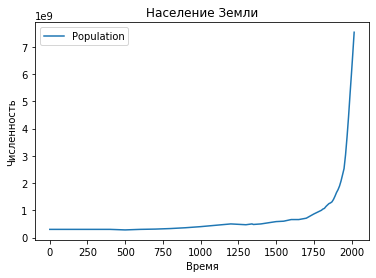

In [15]:
# И теперь можем получить график: Экспонента мирового населения за 2000 лет

earth_population_1_2017.plot(x='Year', y='Population',title='Население Земли', xlabel='Время', ylabel='Численность')

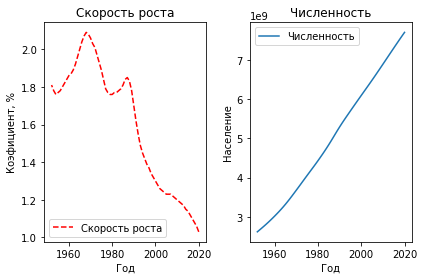

In [16]:
# И теперь более подробно последние 70 лет

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.plot(earth_population['growthrate_zw'], color='#ff0000',
        linestyle='--', label='Скорость роста')
ax2.plot(earth_population['count_zw'], label='Численность')

ax1.legend()
ax1.set_title('Скорость роста')
ax1.set_xlabel('Год')
ax1.set_ylabel('Коэфициент, %')

ax2.legend()
ax2.set_title('Численность')
ax2.set_xlabel('Год')
ax2.set_ylabel('Население')

plt.tight_layout()
plt.show()


In [17]:
# Теперь мы видим, что человечество может плодиться по экспоненте,
# но и у этого могущества есть границы физических возможностей.

# Все же численность продолжает увеличиваться достаточно круто. 
# На чьих же плечах лежит эта, полная вдохновения, ноша?

# Сначала определим континент или "часть света" полную энтузиазма.
# Потом попробуем назвать страны, преуспевающие в этом направлении.
# И под конец попробуем ответить на вопрос, что стимулирует людей
# видеть мир пригодным для увеличения чесленностти населения.

In [18]:
# Выяснилось, что часть данных в датасете отображают не страны, 
# а союзы и территории. удалим их.

population_YC.drop(index=[1, 5, 21, 34, 36, 39, 41, 42, 47, 49, 
                          59, 60, 61, 62, 63, 65, 66, 67, 71, 72, 
                          77, 84, 93, 94, 96, 100, 101, 102, 103, 
                          105, 109, 123, 125, 126, 131, 132, 133, 
                          135, 136, 137, 139, 143, 144, 150, 151, 
                          153, 154, 158, 167, 178, 180, 188, 190, 
                          193, 194, 195, 201, 212, 214, 215, 222, 
                          227, 228, 233, 234, 235, 237, 238, 246, 
                          250, 251, 252, 253, 256, 258, 259, 260], inplace=True)
# population_YC.drop(index=[], inplace=True)
# population_YC['Country name'].str.contains('')

In [19]:
population_YC.head(2)

,Country name,C_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277,89005,90853,92898,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318,15949766,16440924,16983266,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0


In [20]:
# Создадим колонку принадлежности страны к континенту.

population_YC['Continent'] = population_YC['Country name'].apply(country_to_continent)
population_YC.head(2)

# (Черновики)
#population_YC = population_YC.insert(1, 'Continent', population_YC['Country name'].apply(country_to_continent))
#population_YC.plot(column='Country name')
#plt.tight_layout()

,Country name,C_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Continent
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277,89005,90853,92898,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,North America
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318,15949766,16440924,16983266,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,Africa


In [21]:
# Группируем таблицу по континентам, а показатели стран континентов суммируем

continent_Y = population_YC.groupby('Continent').sum()

In [22]:
continent_Y.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

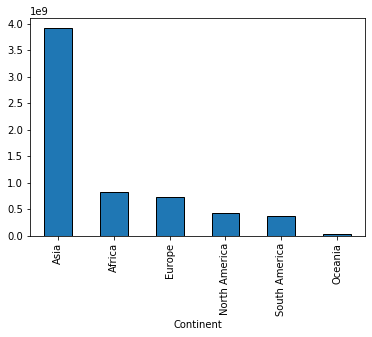

In [23]:
# Логично предположить, что для "производства" людей нужны
# "производственные мощности". Т.е. большое кол-во
# людей произведет больше людей, чем меньшее кол-во людей.
# Сравним этот потенциал у частей света.

continent_Y['2010'].sort_values(ascending=False).plot(kind='bar', edgecolor='black')


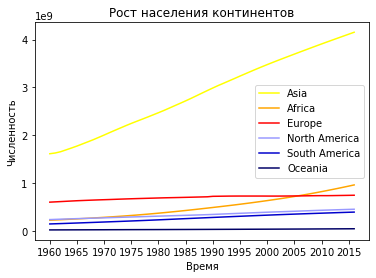

In [24]:
# По данному показателю превосходство у Азии неоспоримо.
# Выведем на экран график успехов всех континентов и посмотрим так ли это. 

plt.plot(continent_Y.loc['Asia'], color='yellow', label='Asia')
plt.plot(continent_Y.loc['Africa'], color='orange', label='Africa')
plt.plot(continent_Y.loc['Europe'], color='red',label='Europe')
plt.plot(continent_Y.loc['North America'], color='#9999FF', label='North America')
plt.plot(continent_Y.loc['South America'], color='#0000CC', label='South America')
plt.plot(continent_Y.loc['Oceania'], color='#000066', label='Oceania')

plt.xticks(continent_Y.columns[::5])
plt.legend()
plt.title('Рост населения континентов')
plt.xlabel('Время')
plt.ylabel('Численность')

#plt.tight_layout()
plt.show()

In [25]:
# И вот мы видим, что есть континент, Африка, с намного меньшим населением, 
# чем у Азии, но по темпу роста выходит с ней вровень, обогнав остальных.

In [26]:
# Теперь подключим к анализу показатель ВВП, дабы оценить имеется ли 
# взаимное влияние этих показателей


In [27]:
GDP.tail(2)

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,10.519,12.293,15.792,20.208,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967
179,Zimbabwe,5.963,8.136,12.883,30.856,10.515,4.7,4.552,5.54,18.281,63.039,3.556,4.22,5.528,6.214,6.851,13.905,14.292,14.994,15.736,16.609,17.529,25.791,27.806


In [28]:
GDP = GDP.drop(index=[10,59,71,86,97,149,156,160,177])
GDP['Country'].iloc[0] = 'Afghanistan'
#GDP.drop(index=[177], inplace=True)
#GDP['Country'].str.contains('Yemen, ').iloc[150:180]
GDP['Continent'] = GDP['Country'].apply(country_to_continent)

In [29]:
GDP.tail(2)

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Continent
178,Zambia,3.132,3.238,3.64,3.775,4.326,5.44,7.271,10.942,10.104,10.519,12.293,15.792,20.208,21.829,23.613,24.466,25.158,27.17,29.911,32.957,36.316,21.699,23.967,Africa
179,Zimbabwe,5.963,8.136,12.883,30.856,10.515,4.7,4.552,5.54,18.281,63.039,3.556,4.22,5.528,6.214,6.851,13.905,14.292,14.994,15.736,16.609,17.529,25.791,27.806,Africa


In [30]:
# устранение проблемы типов данных и лишних запятых в значениях
for col in range(1,len(GDP.columns)-1):
    for row in range(len(GDP.index)):
        GDP.iloc[row,col] = float(str(GDP.iloc[row,col]).replace(',',''))
        
# astype('str')
# replace(',','')
# astype('float64')
# float(GDP.iloc[row,col])
#GDP.iloc[::,1:24:].astype('float')
#GDP = GDP.iloc[::,1:24:].replace(',','')
#GDP[.iloc[::,1:24]].astype('float')
#df = df.apply(pd.to_numeric)
#GDP.to_csv('GDPdf.csv')

In [31]:
# Также сгруппируем по континентам и найдем среднее значение ВВП на континент.
continent_GDP = GDP.groupby('Continent').mean()

C:\Users\OLGA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
# Поворот таблицы для удобства чтения

continent_GDP = continent_GDP.transpose()
continent_GDP.head(2)

Continent,Africa,Asia,Europe,North America,Oceania,South America
1999,10.966686,175.898833,265.657027,525.9348,51.679444,102.827000
2000,11.433039,188.910262,249.859324,561.8886,49.842333,109.257333


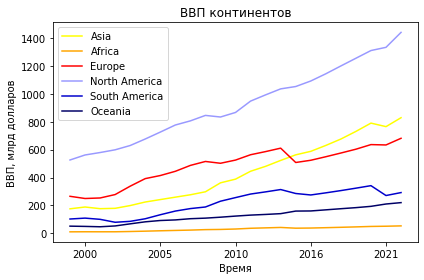

In [33]:
plt.plot(continent_GDP['Asia'], color='yellow', label='Asia')
plt.plot(continent_GDP['Africa'], color='orange', label='Africa')
plt.plot(continent_GDP['Europe'], color='red',label='Europe')
plt.plot(continent_GDP['North America'], color='#9999FF', label='North America')
plt.plot(continent_GDP['South America'], color='#0000CC', label='South America')
plt.plot(continent_GDP['Oceania'], color='#000066', label='Oceania')
plt.xticks(continent_GDP.index[1::5])
plt.legend()
plt.title('ВВП континентов')
plt.xlabel('Время')
plt.ylabel('ВВП, млрд долларов')

plt.tight_layout()
plt.show()

In [34]:
# Видно, что экономические показатели тут особой роли не играют.

In [35]:
# Темп прироста считается по формуле: 
# (текущий уровень - предыдущий уровень) / предыдущий уровень * 100%

In [36]:
cons = (continent_Y['2016'] - continent_Y['2011']) / continent_Y['2011'] * 100
cons

Continent
Africa           14.100285
Asia              5.162513
Europe            1.164098
North America     4.230572
Oceania           8.382384
South America     5.064324
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

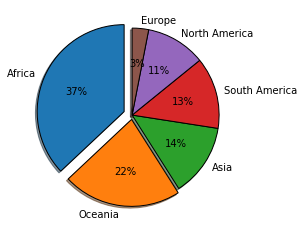

In [37]:
# Построим круговую диаграмму для наглядности
slices = [num for num in cons.sort_values(ascending=False)]
labels = [con for con in cons.sort_values(ascending=False).index]
explode = [0.1, 0.05, 0, 0, 0, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
       startangle=90, autopct='%1.f%%',
       wedgeprops={'edgecolor': 'black'})
plt.title('')
plt.show

In [38]:
# Итак, мы видим, что Африка на протяжении более чем 50 лет переживает 
# Демографический взрыв, и является лидером по скорости 
# учеличения численности населения.
# Этот процесс вызван убеждениями Африканских народов и личным стремлением 
# каждого африканца, находящегося в данном окружении.
# 
# Приход в эти страны современной медицины, образования и других атрибутов
# цивилизованного мира, вывели это стремление на новый уровень. 
# И если раньше это стремление имело характеристику
# способа выживания, национального воспроизводства, то теперь 
# оно может иметь непредвиденные последствия, и нести с собой как пользу,
# так и угрозы в масштабах мира.

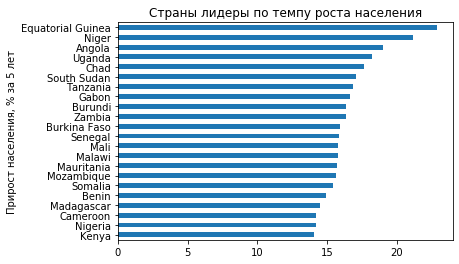

In [39]:

af_filt = population_YC[population_YC['Continent'] == 'Africa']
af_filt = af_filt.set_index('Country name')
Africa = (af_filt['2016'] - af_filt['2011']) / af_filt['2011'] * 100
Africa.sort_values().tail(22).plot(kind='barh', 
                                   title='Страны лидеры по темпу роста населения', 
                                   ylabel='Страны', xlabel='Прирост населения, % за 5 лет')